# Federico Ariton
### Higher Diploma in Science in Data Analytics for Business
### CA 2 Integrated
### Student Number:sba22090

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Importing the dataset
Employee = pd.read_csv('Employee_Attrition.csv')
Employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,...,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,...,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,...,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,...,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,...,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,No,Travel_Frequently,914.061807,Research & Development,21.647903,NaN,Medical,0.950166,2142.083554,...,3.020184,85.835352,0.962354,NaN,3.451951,2.819336,5.436125,2.021736,0.000000,NaN
1466,34.957777,No,NaN,574.675152,Research & Development,6.027683,1.122961,Medical,1.064563,2221.578902,...,1.014690,94.868401,0.923291,NaN,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,No,Travel_Rarely,151.506083,Research & Development,NaN,3.478895,Life Sciences,0.960908,NaN,...,1.952083,93.310094,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,NaN,No,Travel_Frequently,995.977086,Human Resources,2.094496,2.956093,Medical,0.873312,2086.654641,...,4.182100,83.920873,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,NaN


In [3]:
# Size of the dataset
Employee.shape

(1470, 35)

In [4]:
# Implementing 'describe' method provides a summary of the
# statistics of the dataset numeric columns.
Employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


In [5]:
Employee.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323,1323,1323.000000,1323,1323.000000,1323.000000,1323,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1065,890,NaN,824,NaN,NaN,504,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.635268,NaN,NaN,802.030050,NaN,9.091097,2.923447,NaN,0.999325,1026.679166,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,NaN,NaN,414.031025,NaN,8.177870,1.072203,NaN,0.099656,610.480802,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,NaN,NaN,86.828045,NaN,0.750112,0.770362,NaN,0.628985,1.054148,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,NaN,NaN,456.479553,NaN,2.147069,2.122706,NaN,0.931146,501.854842,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,NaN,NaN,782.958705,NaN,6.920808,3.015658,NaN,0.998949,1022.025017,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,NaN,NaN,1130.577949,NaN,13.584900,3.700560,NaN,1.067371,1533.811096,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964


In [6]:
# Analyzing missing values in the dataset
Employee.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

In [7]:
# Calling the 'info' method on the dataset 
Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   DailyRate                 1323 non-null   float64
 4   Department                1323 non-null   object 
 5   DistanceFromHome          1323 non-null   float64
 6   Education                 1323 non-null   float64
 7   EducationField            1323 non-null   object 
 8   EmployeeCount             1323 non-null   float64
 9   EmployeeNumber            1323 non-null   float64
 10  EnvironmentSatisfaction   1323 non-null   float64
 11  Gender                    1323 non-null   object 
 12  HourlyRate                1323 non-null   float64
 13  JobInvolvement            1323 non-null   float64
 14  JobLevel

In [8]:
# Implementing the data types of each column, and check the value,string,int...
Employee.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EmployeeCount               float64
EmployeeNumber              float64
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            

In [9]:
# Describing the value that has object,that we previously visualize in the .dtypes
Employee.describe(include=object)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1323,1323,1323,1323,1323,1323,1323,1323,1323
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1065,890,824,504,783,281,596,1323,929


In [10]:
# Visualizing the name of the columns
Employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

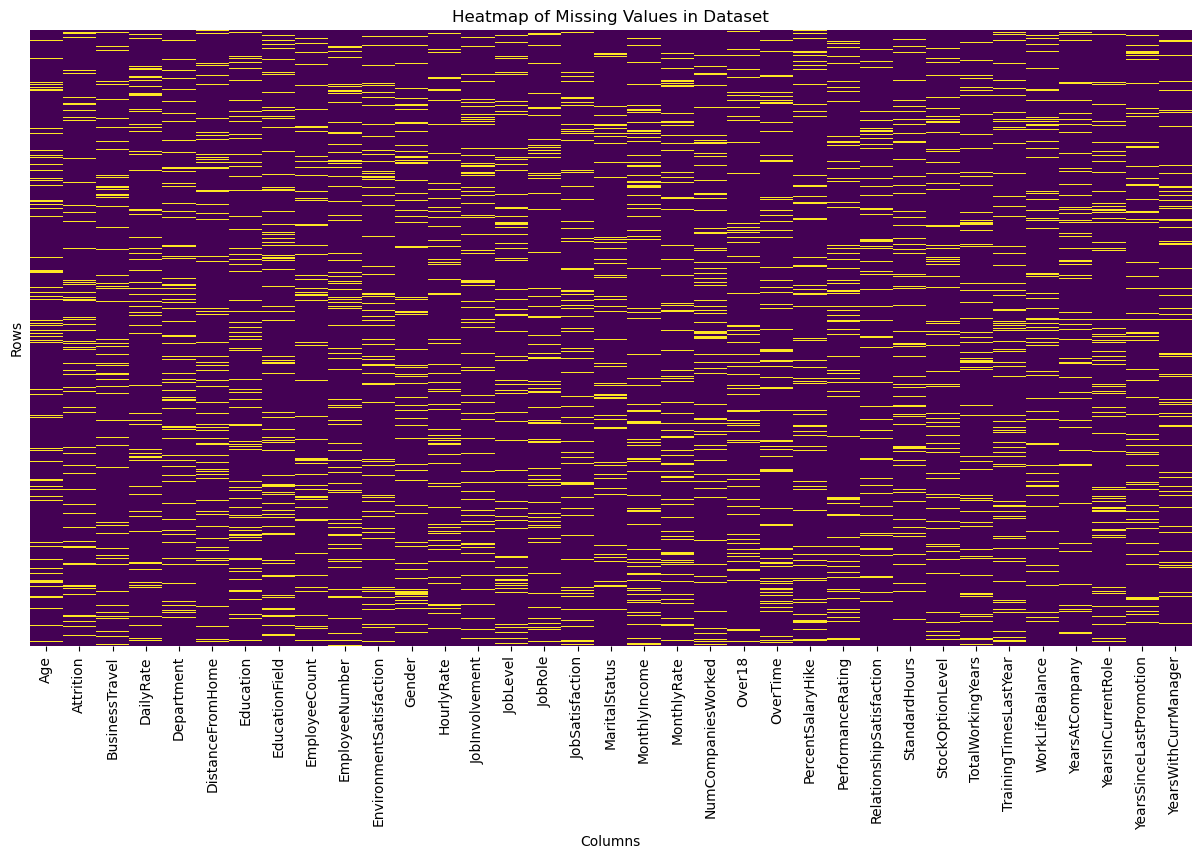

In [11]:
# Creating a heatmap for missing values
plt.figure(figsize=(15, 8))
sns.heatmap(Employee.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [12]:
missing_values = Employee.isnull().sum()
missing_values

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

In [13]:
print(Employee['EnvironmentSatisfaction'])

0       2.146294
1       3.470803
2       3.979420
3       3.734705
4       1.079412
          ...   
1465    3.171444
1466    4.284094
1467    2.152282
1468    4.095580
1469    1.738502
Name: EnvironmentSatisfaction, Length: 1470, dtype: float64


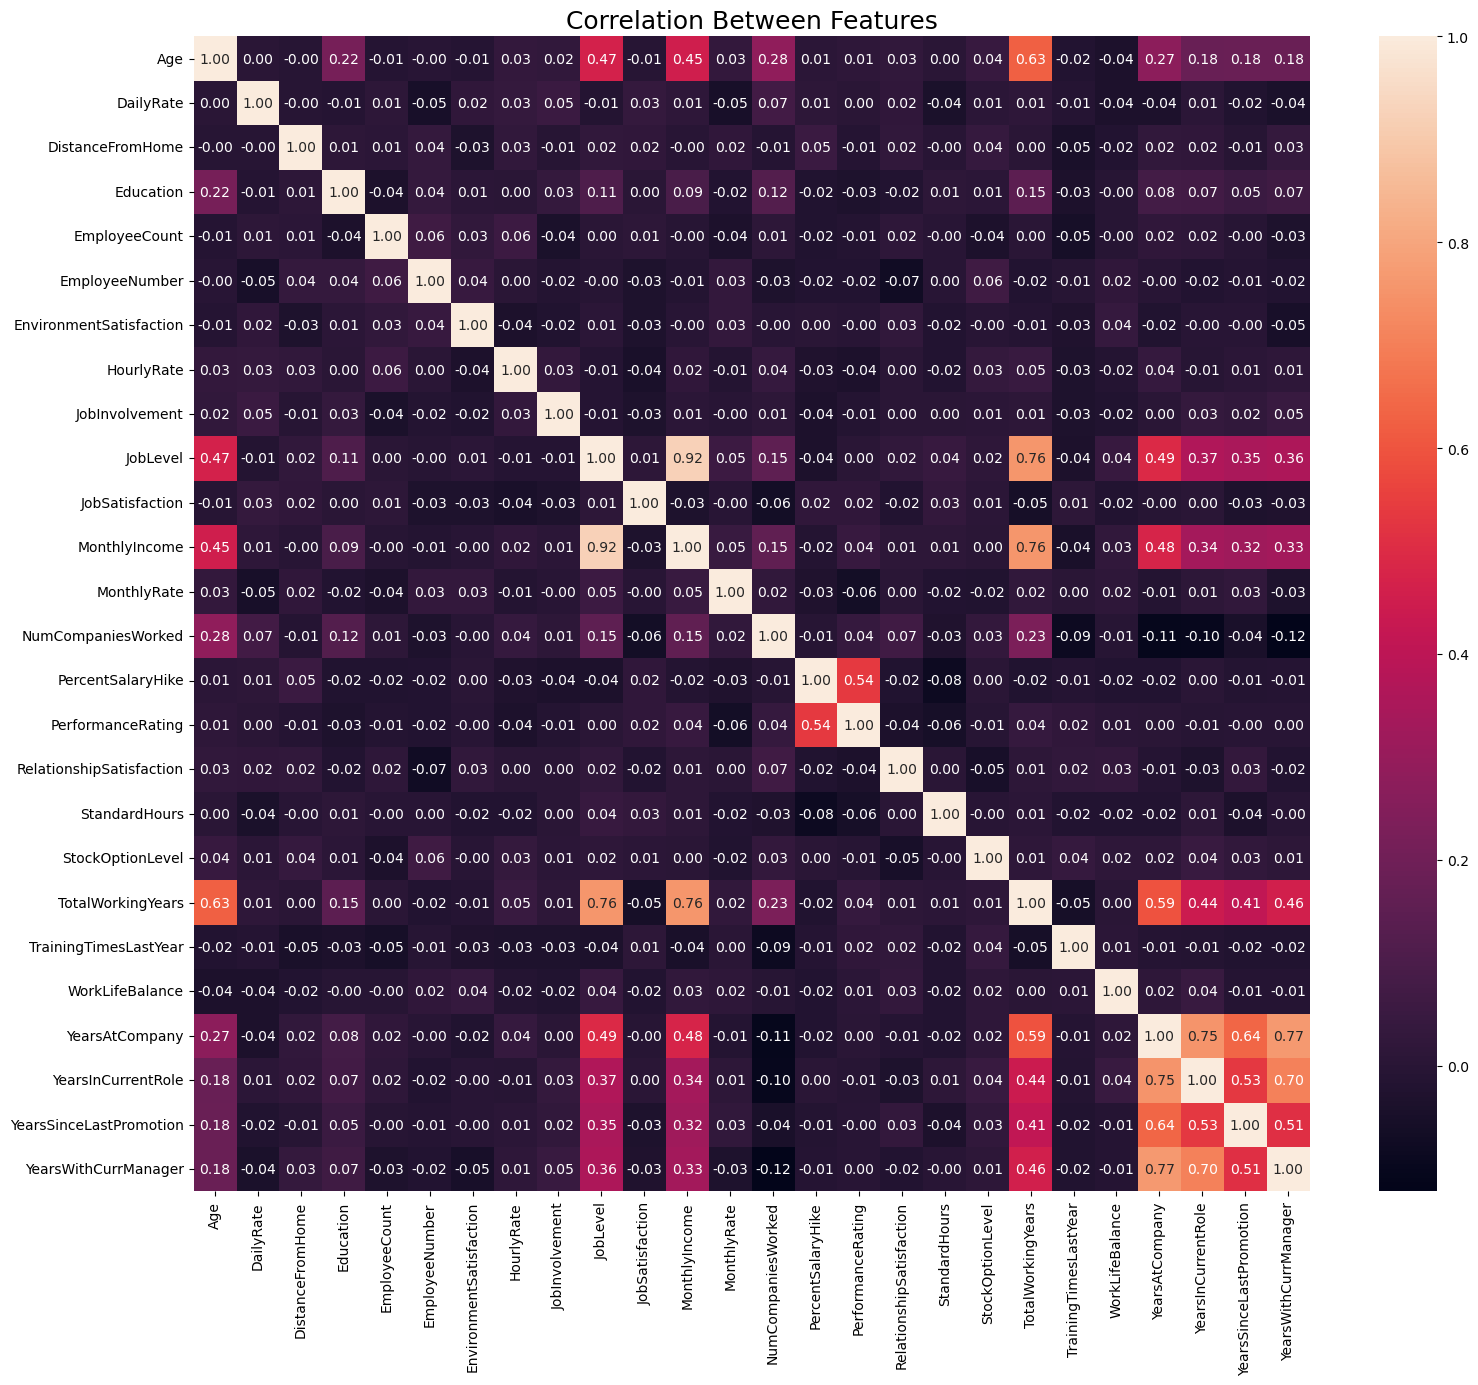

In [14]:
# Visualizing the features in our data set measuring how
# close are realted two variable to each other
plt.figure(figsize=(18,15))
sns.heatmap(Employee.corr(), annot=True, fmt='.2f')
plt.title('Correlation Between Features', fontsize=18)
plt.show()

In [15]:
import numpy as np


# Re-extracting the upper triangle of the correlation matrix
upper_corr_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Flattening the matrix and removing NaN values
correlation_pairs = upper_corr_matrix.unstack().dropna()

# Sorting the pairs by absolute correlation value in descending order
sorted_correlation_pairs = correlation_pairs.abs().sort_values(ascending=False)

# Displaying the sorted correlation pairs
sorted_correlation_pairs.head(30)  # Displaying the top 10 pairs for brevity



NameError: name 'correlation_matrix' is not defined

In [16]:
duplicated_data = Employee.duplicated().any()
duplicated_data

False

In [17]:
Employee[['Age', 'Attrition']]



,Age,Attrition
0,41.920786,Yes
1,51.589037,No
2,33.131540,Yes
3,34.707073,No
4,24.790188,No
...,...,...
1465,37.421699,No
1466,34.957777,No
1467,26.884296,No
1468,NaN,No


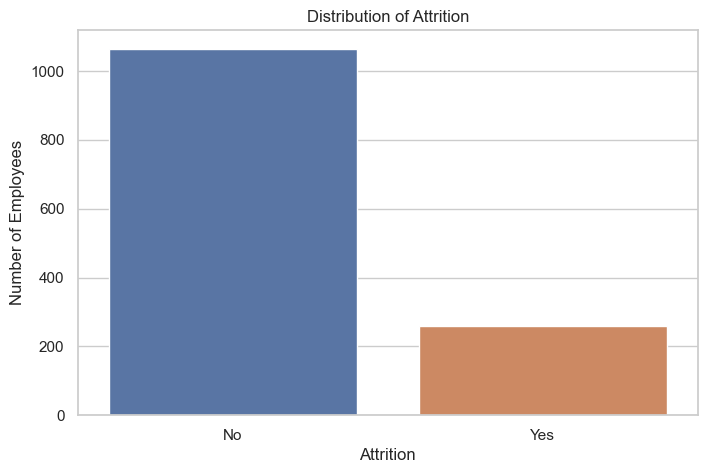

No     1065
Yes     258
Name: Attrition, dtype: int64

In [18]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the distribution of the 'Attrition' column
attrition_count = Employee['Attrition'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=attrition_count.index, y=attrition_count.values)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()

attrition_count

In [19]:
# Checking for missing values in each column
missing_values = Employee.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Percentage of missing values
missing_percentage = (missing_values / len(Employee)) * 100

# Creating a DataFrame to display missing data stats
missing_stats = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_stats


,Missing Values,Percentage
Age,147,10.0
StandardHours,147,10.0
NumCompaniesWorked,147,10.0
Over18,147,10.0
OverTime,147,10.0
PercentSalaryHike,147,10.0
PerformanceRating,147,10.0
RelationshipSatisfaction,147,10.0
StockOptionLevel,147,10.0
MonthlyIncome,147,10.0


In [20]:
# Identifying numerical and categorical columns
numerical_cols = Employee.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = Employee.select_dtypes(include=['object']).columns.tolist()

# Separating columns with missing values into numerical and categorical
missing_numerical_cols = [col for col in numerical_cols if col in missing_values.index]
missing_categorical_cols = [col for col in categorical_cols if col in missing_values.index]

missing_numerical_cols, missing_categorical_cols


(['Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'],
 ['Attrition',
  'BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime'])

In [21]:
# Imputation for numerical columns
for col in missing_numerical_cols:
    median_value = Employee[col].median()
    Employee[col].fillna(median_value, inplace=True)

# Imputation for categorical columns
for col in missing_categorical_cols:
    mode_value = Employee[col].mode()[0]
    Employee[col].fillna(mode_value, inplace=True)

# Check if there are any missing values left
Employee.isnull().sum().sum()


0

In [22]:
Employee.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [23]:
Employee.head(50)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,...,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,6.920808,1.035333,Life Sciences,0.944859,2.107031,...,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,...,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,...,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,0.998949,7.228740,...,2.891235,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
5,29.766336,No,Travel_Frequently,900.495555,Research & Development,1.805415,3.015658,Life Sciences,0.911961,8.434914,...,2.798835,80.351400,0.000000,6.694851,1.871592,2.046544,6.092499,8.389254,3.131537,7.060896
6,61.934723,No,Travel_Rarely,1284.456352,Research & Development,2.502578,3.015658,Medical,0.842456,11.019992,...,0.809695,80.237136,3.190519,11.226132,2.690934,2.198286,5.422160,0.000000,0.000000,0.000000
7,27.098235,No,Travel_Rarely,782.958705,Research & Development,22.329189,0.923262,Life Sciences,0.888357,10.066385,...,2.062221,75.003287,0.891104,1.058393,1.868045,2.899807,0.962310,0.000000,0.000000,0.000000
8,30.379999,No,Travel_Frequently,195.346240,Research & Development,6.920808,3.209049,Life Sciences,0.834966,13.496344,...,2.156785,91.975003,0.000000,10.088953,1.905135,3.104763,9.894773,7.992665,1.151091,7.080628
9,35.373614,No,Travel_Rarely,1277.914019,Research & Development,28.618060,3.144818,Technical Degree,0.998949,12.351803,...,1.933506,86.334628,1.947497,18.805415,3.008464,2.105678,5.959244,6.414024,0.967140,6.447820


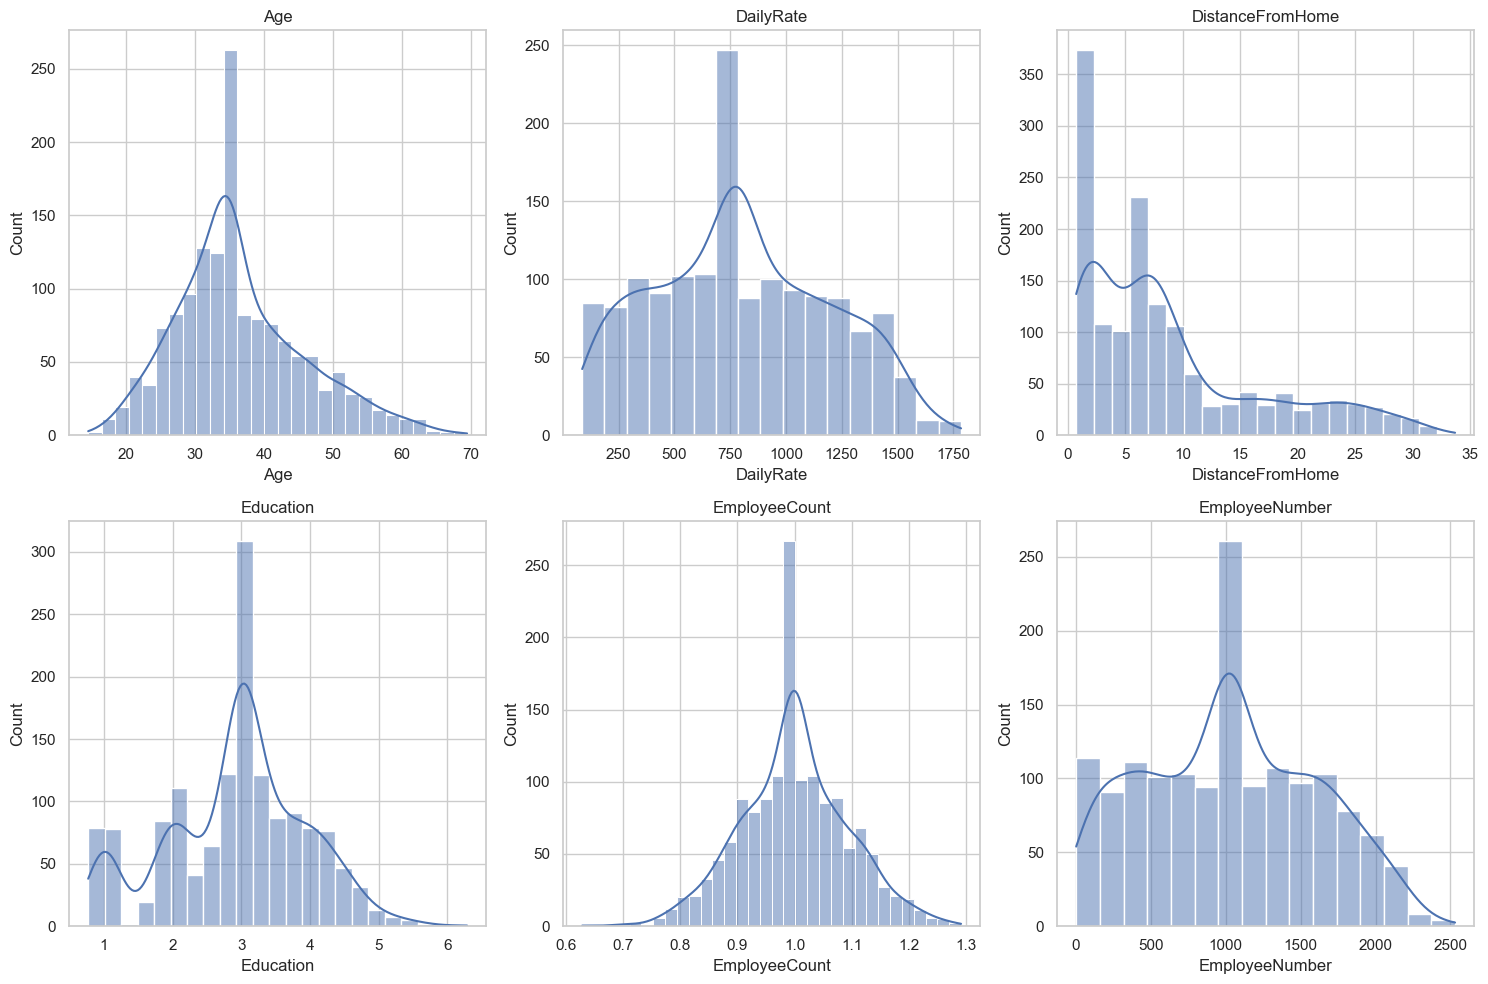

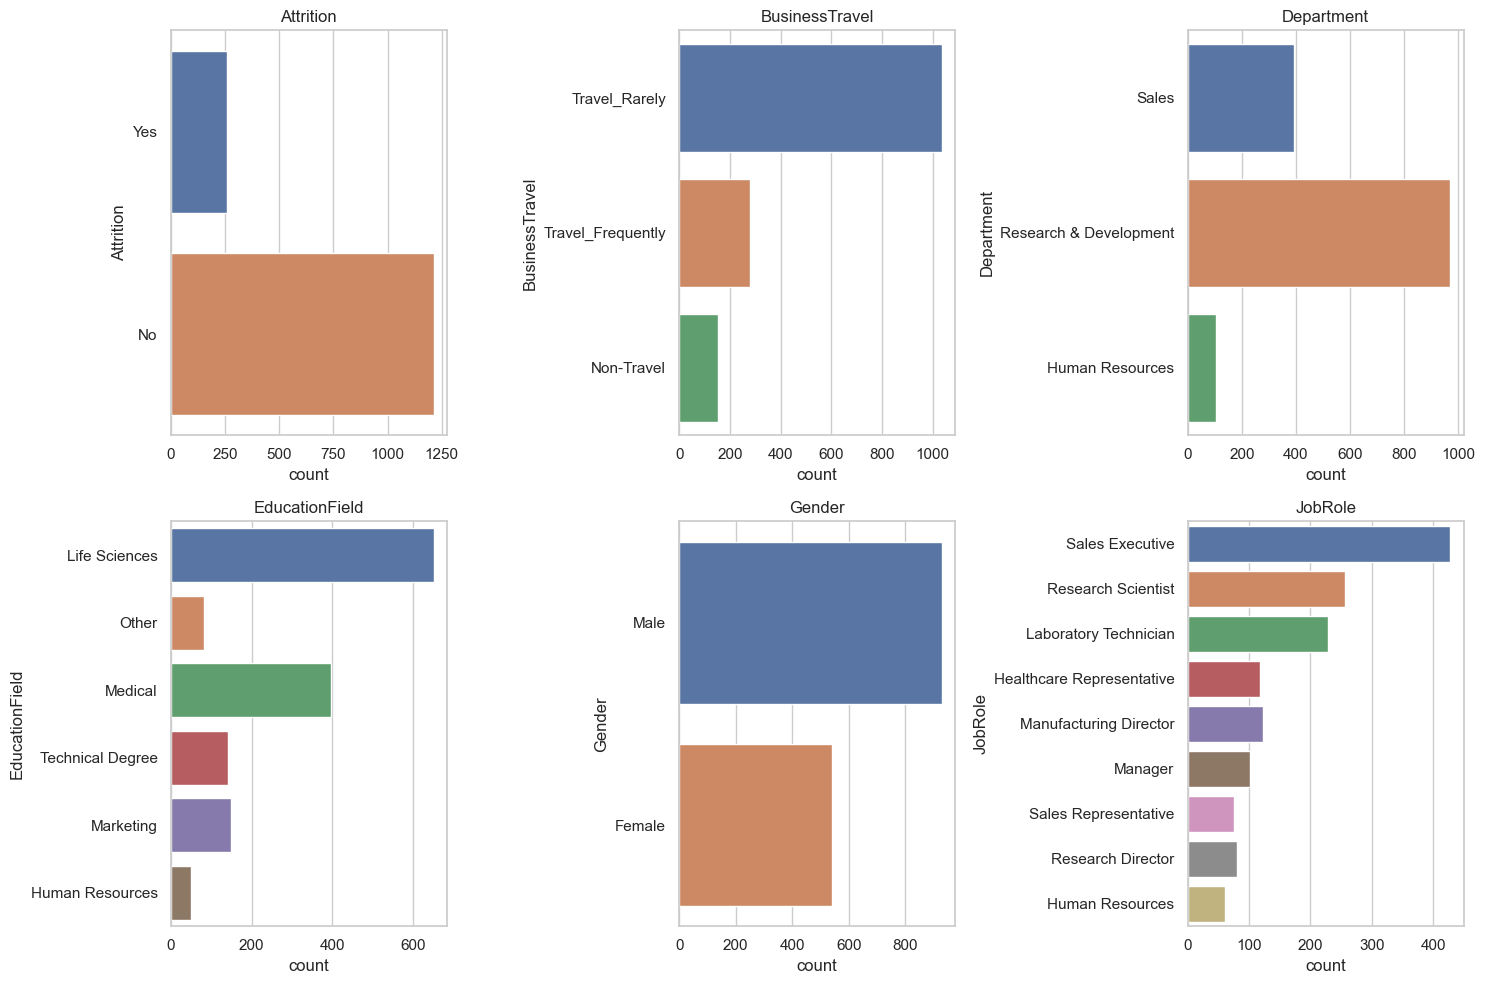

In [24]:
# Selecting a subset of numerical and categorical columns for visualization
sample_numerical_cols = numerical_cols[:6]  # First 6 numerical columns
sample_categorical_cols = categorical_cols[:6]  # First 6 categorical columns

# Plotting histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(sample_numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(Employee[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Plotting bar plots for categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(sample_categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=Employee[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encoding for binary categorical variables
label_encoder = LabelEncoder()
binary_categorical_cols = [col for col in categorical_cols if len(Employee[col].unique()) == 2]
for col in binary_categorical_cols:
    Employee[col] = label_encoder.fit_transform(Employee[col])

# One-hot encoding for non-binary categorical variables
data = pd.get_dummies(Employee, columns=[col for col in categorical_cols if col not in binary_categorical_cols])

# Now, we'll standardize the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Employee[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the transformed data
Employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.581118,1,Travel_Rarely,0.483825,Sales,-1.009610,-1.142731,Life Sciences,0.359867,-1.770766,...,-1.627775,2.018961,-1.006877,-0.409944,-2.220402,-2.383099,-0.171504,-0.032386,-0.663655,0.173677
1,1.611289,0,Travel_Frequently,-1.332765,Research & Development,-0.250979,-1.865303,Life Sciences,-0.575924,-1.768947,...,1.486031,0.672781,0.341870,-0.292672,0.369009,-0.345567,0.571562,1.097667,-0.328051,0.554879
2,-0.355393,1,Travel_Rarely,1.028925,Research & Development,-0.857739,-0.800127,Other,-1.994338,-1.765663,...,-0.382201,-0.526317,-1.006877,-0.362656,0.162463,0.204892,-1.179104,-1.176848,-0.663655,-1.167288
3,-0.187517,0,Travel_Frequently,1.407337,Sales,-0.762759,0.725546,Life Sciences,-1.865604,-1.764663,...,0.275668,-0.573554,-1.006877,-0.462154,0.044673,0.470602,0.287340,0.417437,0.261410,-1.167288
4,-1.244180,0,Travel_Rarely,-0.802362,Research & Development,-0.884685,-1.781577,Medical,-0.003583,-1.760100,...,0.145086,-0.996496,0.156733,-0.647046,0.011932,0.464057,-0.824438,-0.612114,0.147792,-0.519608


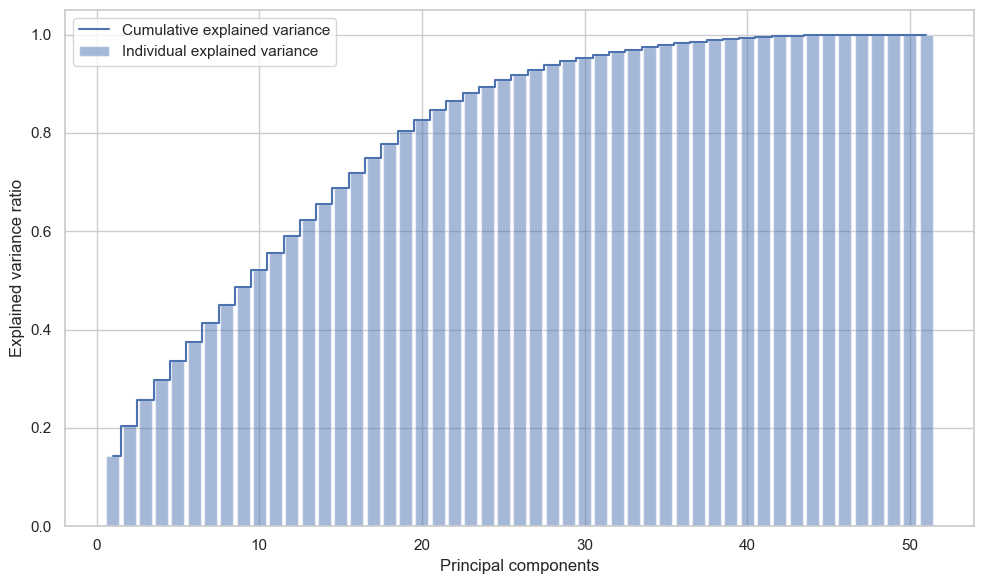

In [28]:
# Re-importing necessary libraries as the execution state has been reset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Impute missing values with median for numerical and mode for categorical columns
numerical_cols = Employee.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = Employee.select_dtypes(include=['object']).columns.tolist()

for col in numerical_cols:
    median_value = Employee[col].median()
    Employee[col].fillna(median_value, inplace=True)

for col in categorical_cols:
    mode_value = Employee[col].mode()[0]
    Employee[col].fillna(mode_value, inplace=True)

# Define a transformer for numerical attributes
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define a transformer for categorical attributes
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a preprocessing and modeling pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', PCA())])

# Separate features and target variable
X = Employee.drop('Attrition', axis=1)
y = Employee['Attrition']

# Fit the pipeline to the data
pipeline.fit(X)

# Get the PCA step of the pipeline
pca = pipeline.named_steps['pca']

# Calculate cumulative sum of explained variances
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plotting the cumulative variance against the number of components
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

# Show plot
plt.show()


In [29]:
Employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.581118,1,Travel_Rarely,0.483825,Sales,-1.009610,-1.142731,Life Sciences,0.359867,-1.770766,...,-1.627775,2.018961,-1.006877,-0.409944,-2.220402,-2.383099,-0.171504,-0.032386,-0.663655,0.173677
1,1.611289,0,Travel_Frequently,-1.332765,Research & Development,-0.250979,-1.865303,Life Sciences,-0.575924,-1.768947,...,1.486031,0.672781,0.341870,-0.292672,0.369009,-0.345567,0.571562,1.097667,-0.328051,0.554879
2,-0.355393,1,Travel_Rarely,1.028925,Research & Development,-0.857739,-0.800127,Other,-1.994338,-1.765663,...,-0.382201,-0.526317,-1.006877,-0.362656,0.162463,0.204892,-1.179104,-1.176848,-0.663655,-1.167288
3,-0.187517,0,Travel_Frequently,1.407337,Sales,-0.762759,0.725546,Life Sciences,-1.865604,-1.764663,...,0.275668,-0.573554,-1.006877,-0.462154,0.044673,0.470602,0.287340,0.417437,0.261410,-1.167288
4,-1.244180,0,Travel_Rarely,-0.802362,Research & Development,-0.884685,-1.781577,Medical,-0.003583,-1.760100,...,0.145086,-0.996496,0.156733,-0.647046,0.011932,0.464057,-0.824438,-0.612114,0.147792,-0.519608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101732,0,Travel_Frequently,0.290159,Research & Development,1.641341,0.081589,Medical,-0.519774,1.927450,...,0.266790,0.733833,0.168139,-0.248210,0.517317,0.059166,-0.234058,-0.597514,-0.663655,-0.309521
1466,-0.160804,0,Travel_Rarely,-0.574130,Research & Development,-0.365739,-1.779153,Medical,0.690699,2.064763,...,-1.626022,1.921136,0.120444,-0.248210,1.841970,-0.298353,0.112295,0.973476,-0.384030,0.804542
1467,-1.021049,0,Travel_Rarely,-1.651780,Research & Development,-0.250979,0.537004,Life Sciences,-0.406105,-0.007235,...,-0.741298,1.716312,0.331997,-0.642253,-2.220402,-0.261748,-0.142079,-0.654554,-0.663655,-0.212676
1468,-0.161425,0,Travel_Frequently,0.498766,Human Resources,-0.871124,0.023029,Medical,-1.332984,1.831708,...,1.363421,0.482194,-1.006877,0.523255,0.427376,-1.087275,0.166237,0.703687,-0.663655,-0.309521
